**Final Project 2 : Logistic Regression dan SVM**

**Latar Belakang**

Australia memiliki iklim yang sangat bervariasi dari delapan negara bagian dan wilayahnya. Sebagian besar wilayah australia memiliki empat musim, yaitu musim panas, musim gugur, musim dingin, dan musim semi. Musim-musim yang terjadi di Australia berkebalikan dengan yang biasanya terjadi di negara-negara belahan dunia utara. Biasanya musim panas berlangsung pada bulan Desember hingga Februari, musim gugur pada bulan Maret hingga Mei, musim dingin pada bulan Juni hingga Agustus, dan musim semi pada bulan September hingga November.

Tetapi tidak dapat dipungkiri tentu saja cuaca tidak dapat diprediksi dengan tepat dengan hanya melihat melalui jangka bulan terjadi biasanya. Maka dari itu disini akan memprediksi cuaca apakah hari esok hujan atau cerah pada wilayah-wilayah di australia dengan beberapa perbandingan.

**Deskripsi Data** 

Pada dataset ini tediri dari 23 atribut, yaitu :
- Date = tanggal hari itu
- Location = lokasi, nama kota di Australia
- MinTemp = temperatur terendah hari itu dalam celcius
- MaxTemp = temperatur tertinggi hari itu dalam celcius
- Rainfall = jumlah curah hujan hari itu dalam mm
- Evaporation = jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine = jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir = arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed = kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am = arah angin jam 9 pagi
- WindDir3pm = arah angin jam 3 sore
- WindSpeed9am = kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm = kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am = kelembapan jam 9 pagi dalam persen
- Humidity3pm = kelembapan jam 3 sore dalam persen
- Pressure9am = tekanan udara jam 9 pagi dalam hpa
- Pressure3pm = tekanan udara jam 3 sore dalam hpa
- Cloud9am = persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm = persentase langit yang tertutup awan jam 3 sore
- Temp9am = temperatur jam 9 pagi dalam celcius
- Temp3pm = temperatur jam 3 sore dalam celcius
- RainToday = apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
- RainTomorrow = variable yang mau di prediksi

**Objective Yang Ingin Dicapai**

Beberapa objective yang ingin dicapai diantaranya :
- apa saja yang mempengaruhi ketika memprediksi cuaca hujan di wilayah-wilayah Australia
- dapat memprediksi terjadinya hujan atau tidak pada hari esok
- mendapatkan model yang sesuai untuk digunakan dalam memprediksi hujan di wilayah-wilayah Australia

**Import Pustaka**

In [4]:
#import library untuk dataframe
import pandas as pd
import numpy as np
#import untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error
#import untuk explorasi data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import missingno as msno
#import untuk modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
# For API Adjustment
import pickle

%matplotlib inline

**Data Loading**

In [5]:
#mengambil dan membaca dataset
df = pd.read_csv("weatherAUS.csv")

In [6]:
#melihat 5 record teratas
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [7]:
#melihat 5 record terbawah
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [8]:
#melihat total baris dan kolom pada dataset
df.shape

(145460, 23)

In [9]:
#melihat informasi singkat mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
#melihat ringkasan statistik data dari setiap kolom numeric dalam dataset
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [11]:
#mengecek nilai null pada database
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Data Cleaning**

In [12]:
#menghapus baris dengan nilai null pada kolom RainToday atau Rain Tomorrow
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)
df.shape

(140787, 23)

In [13]:
#mengecek persentasi missing value pada setiap kolom
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

Missing_Value  Percent
Date                       0    0.0 %
Location                   0    0.0 %
MinTemp                  468   0.33 %
MaxTemp                  307   0.22 %
Rainfall                   0    0.0 %
Evaporation            59694   42.4 %
Sunshine               66805  47.45 %
WindGustDir             9163   6.51 %
WindGustSpeed           9105   6.47 %
WindDir9am              9660   6.86 %
WindDir3pm              3670   2.61 %
WindSpeed9am            1055   0.75 %
WindSpeed3pm            2531    1.8 %
Humidity9am             1517   1.08 %
Humidity3pm             3501   2.49 %
Pressure9am            13743   9.76 %
Pressure3pm            13769   9.78 %
Cloud9am               52625  37.38 %
Cloud3pm               56094  39.84 %
Temp9am                  656   0.47 %
Temp3pm                 2624   1.86 %
RainToday                  0    0.0 %
RainTomorrow               0    0.0 %

In [14]:
#menghapus kolom yang memiliki presentase missing value diatas 35%
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True, axis=1)
df.shape

(140787, 19)

In [15]:
#melakukan salin database
df1 = df.copy()

In [16]:
#mengatasi missing value pada kolom MinTemp, MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, dan Temp3pm dengan mean
df1['MinTemp']=df1['MinTemp'].fillna(df1['MinTemp'].mean())
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].mean())
df1['Rainfall']=df1['Rainfall'].fillna(df1['Rainfall'].mean())
df1['WindGustSpeed']=df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].mean())
df1['WindSpeed9am']=df1['WindSpeed9am'].fillna(df1['WindSpeed9am'].mean())
df1['WindSpeed3pm']=df1['WindSpeed3pm'].fillna(df1['WindSpeed3pm'].mean())
df1['Humidity9am']=df1['Humidity9am'].fillna(df1['Humidity9am'].mean())
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())
df1['Pressure9am']=df1['Pressure9am'].fillna(df1['Pressure9am'].mean())
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].mean())
df1['Temp9am']=df1['Temp3pm'].fillna(df1['Temp9am'].mean())
df1['Temp3pm']=df1['Temp3pm'].fillna(df1['Temp3pm'].mean())

In [17]:
#menghapus baris yang terdapat missing value pada kolom sisa
df1.dropna(axis=0, inplace=True)
df1.shape

(123710, 19)

In [18]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Data Exploration**

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   MaxTemp        123710 non-null  float64
 4   Rainfall       123710 non-null  float64
 5   WindGustDir    123710 non-null  object 
 6   WindGustSpeed  123710 non-null  float64
 7   WindDir9am     123710 non-null  object 
 8   WindDir3pm     123710 non-null  object 
 9   WindSpeed9am   123710 non-null  float64
 10  WindSpeed3pm   123710 non-null  float64
 11  Humidity9am    123710 non-null  float64
 12  Humidity3pm    123710 non-null  float64
 13  Pressure9am    123710 non-null  float64
 14  Pressure3pm    123710 non-null  float64
 15  Temp9am        123710 non-null  float64
 16  Temp3pm        123710 non-null  float64
 17  RainToday      123710 non-nul

In [20]:
df1['Date'] = df1['Date'].apply(lambda x: float(x.split()[0].replace('-', '')))

In [21]:
df1["Location"].value_counts()

Darwin              3119
Hobart              3106
Perth               3049
Brisbane            3029
MelbourneAirport    2943
SydneyAirport       2941
Cobar               2925
PerthAirport        2924
Woomera             2917
Mildura             2903
Cairns              2900
MountGambier        2898
Ballarat            2895
Portland            2890
Townsville          2884
NorfolkIsland       2868
SalmonGums          2865
GoldCoast           2832
Wollongong          2817
Nuriootpa           2812
WaggaWagga          2801
NorahHead           2790
Sale                2771
Canberra            2762
AliceSprings        2748
Adelaide            2746
Watsonia            2745
Bendigo             2725
Witchcliffe         2653
Moree               2635
CoffsHarbour        2568
MountGinini         2524
Walpole             2506
Launceston          2503
PearceRAAF          2469
BadgerysCreek       2458
Albury              2445
Dartmoor            2418
Penrith             2366
Tuggeranong         2322


In [22]:
df1.describe().transpose()

count          mean           std         min         25%  \
Date           123710.0  2.012872e+07  25246.381422  20071101.0  20110131.0   
MinTemp        123710.0  1.241391e+01      6.366792        -8.5         7.8   
MaxTemp        123710.0  2.347481e+01      7.205897        -4.8        18.1   
Rainfall       123710.0  2.375661e+00      8.528039         0.0         0.0   
WindGustSpeed  123710.0  4.068528e+01     13.388636         7.0        31.0   
WindSpeed9am   123710.0  1.501169e+01      8.307285         2.0         9.0   
WindSpeed3pm   123710.0  1.917458e+01      8.571039         2.0        13.0   
Humidity9am    123710.0  6.766387e+01     18.975475         0.0        56.0   
Humidity3pm    123710.0  5.085580e+01     20.839534         0.0        36.0   
Pressure9am    123710.0  1.017417e+03      6.765702       980.5      1013.2   
Pressure3pm    123710.0  1.015030e+03      6.703822       977.1      1010.7   
Temp9am        123710.0  2.186553e+01      7.016822        -5.4        16.8   
Temp3pm        123710.0  2.189577e+01      7.005863        -5.4        16.8   

                        50%         75%         max  
Date           2.013062e+07  20150629.0  20170625.0  
MinTemp        1.220000e+01        17.0        33.9  
MaxTemp        2.300000e+01        28.6        48.1  
Rainfall       0.000000e+00         0.8       367.6  
WindGustSpeed  3.900000e+01        48.0       135.0  
WindSpeed9am   1.300000e+01        20.0        87.0  
WindSpeed3pm   1.900000e+01        24.0        87.0  
Humidity9am    6.882683e+01        81.0       100.0  
Humidity3pm    5.144929e+01        65.0       100.0  
Pressure9am    1.017655e+03      1021.7      1041.0  
Pressure3pm    1.015258e+03      1019.3      1039.6  
Temp9am        2.130000e+01        26.7        46.7  
Temp3pm        2.150000e+01        26.7        46.7

Penjelasan :

count -> menghitung jumlah elemen pada setiap kolom yang terdapat pada dataset
mean -> menghitung rata-rata dari setiap kolom pada dataset
std -> menghitung standar devisiasi dari setiap kolom pada dataset
min -> menghitung nilai minimum dari setiap kolom pada dataset
max -> menghitung nilai maximum dari setiap kolom pada dataset
25%, 50%, 75% -> nilai quartil dari setiap kolom pada dataset

Correlation 1 : membuat kolom kategori

In [23]:
ctg_col = [
    "Date",
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow"
]

df_ctg = df1[ctg_col]

df_ctg.head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  20081201.0   Albury           W          W        WNW        No   
1  20081202.0   Albury         WNW        NNW        WSW        No   
2  20081203.0   Albury         WSW          W        WSW        No   
3  20081204.0   Albury          NE         SE          E        No   
4  20081205.0   Albury           W        ENE         NW        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

In [24]:
#Label Encode Data

Lenc = LabelEncoder()

df_ctg["Date"] = Lenc.fit_transform(df_ctg["Date"])
df_ctg["Location"] = Lenc.fit_transform(df_ctg["Location"])
df_ctg["WindGustDir"] = Lenc.fit_transform(df_ctg["WindGustDir"])
df_ctg["WindDir9am"] = Lenc.fit_transform(df_ctg["WindDir9am"])
df_ctg["WindDir3pm"] = Lenc.fit_transform(df_ctg["WindDir3pm"])
df_ctg["RainToday"] = Lenc.fit_transform(df_ctg["RainToday"])
df_ctg["RainTomorrow"] = Lenc.fit_transform(df_ctg["RainTomorrow"])

df_ctg.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10344\2422196540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ctg["Date"] = Lenc.fit_transform(df_ctg["Date"])
C:\Users\USER\AppData\Local\Temp\ipykernel_10344\2422196540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ctg["Location"] = Lenc.fit_transform(df_ctg["Location"])
C:\Users\USER\AppData\Local\Temp\ipykernel_10344\2422196540.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Date  Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  \
0   377         1           13          13          14          0   
1   378         1           14           6          15          0   
2   379         1           15          13          15          0   
3   380         1            4           9           0          0   
4   381         1           13           1           7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0

In [25]:
corr_ctg = df_ctg.corr()
corr_ctg

Date  Location  WindGustDir  WindDir9am  WindDir3pm  \
Date          1.000000  0.030830    -0.001173    0.002274   -0.001959   
Location      0.030830  1.000000     0.032922   -0.017452    0.020391   
WindGustDir  -0.001173  0.032922     1.000000    0.408314    0.601815   
WindDir9am    0.002274 -0.017452     0.408314    1.000000    0.319399   
WindDir3pm   -0.001959  0.020391     0.601815    0.319399    1.000000   
RainToday    -0.011338 -0.002843     0.135595    0.172744    0.125807   
RainTomorrow -0.012548 -0.001890     0.050900    0.031439    0.027110   

              RainToday  RainTomorrow  
Date          -0.011338     -0.012548  
Location      -0.002843     -0.001890  
WindGustDir    0.135595      0.050900  
WindDir9am     0.172744      0.031439  
WindDir3pm     0.125807      0.027110  
RainToday      1.000000      0.315867  
RainTomorrow   0.315867      1.000000

Correlation Heatmap

C:\Users\USER\AppData\Local\Temp\ipykernel_10344\1475891016.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_ctg, dtype=np.bool))


<AxesSubplot: >

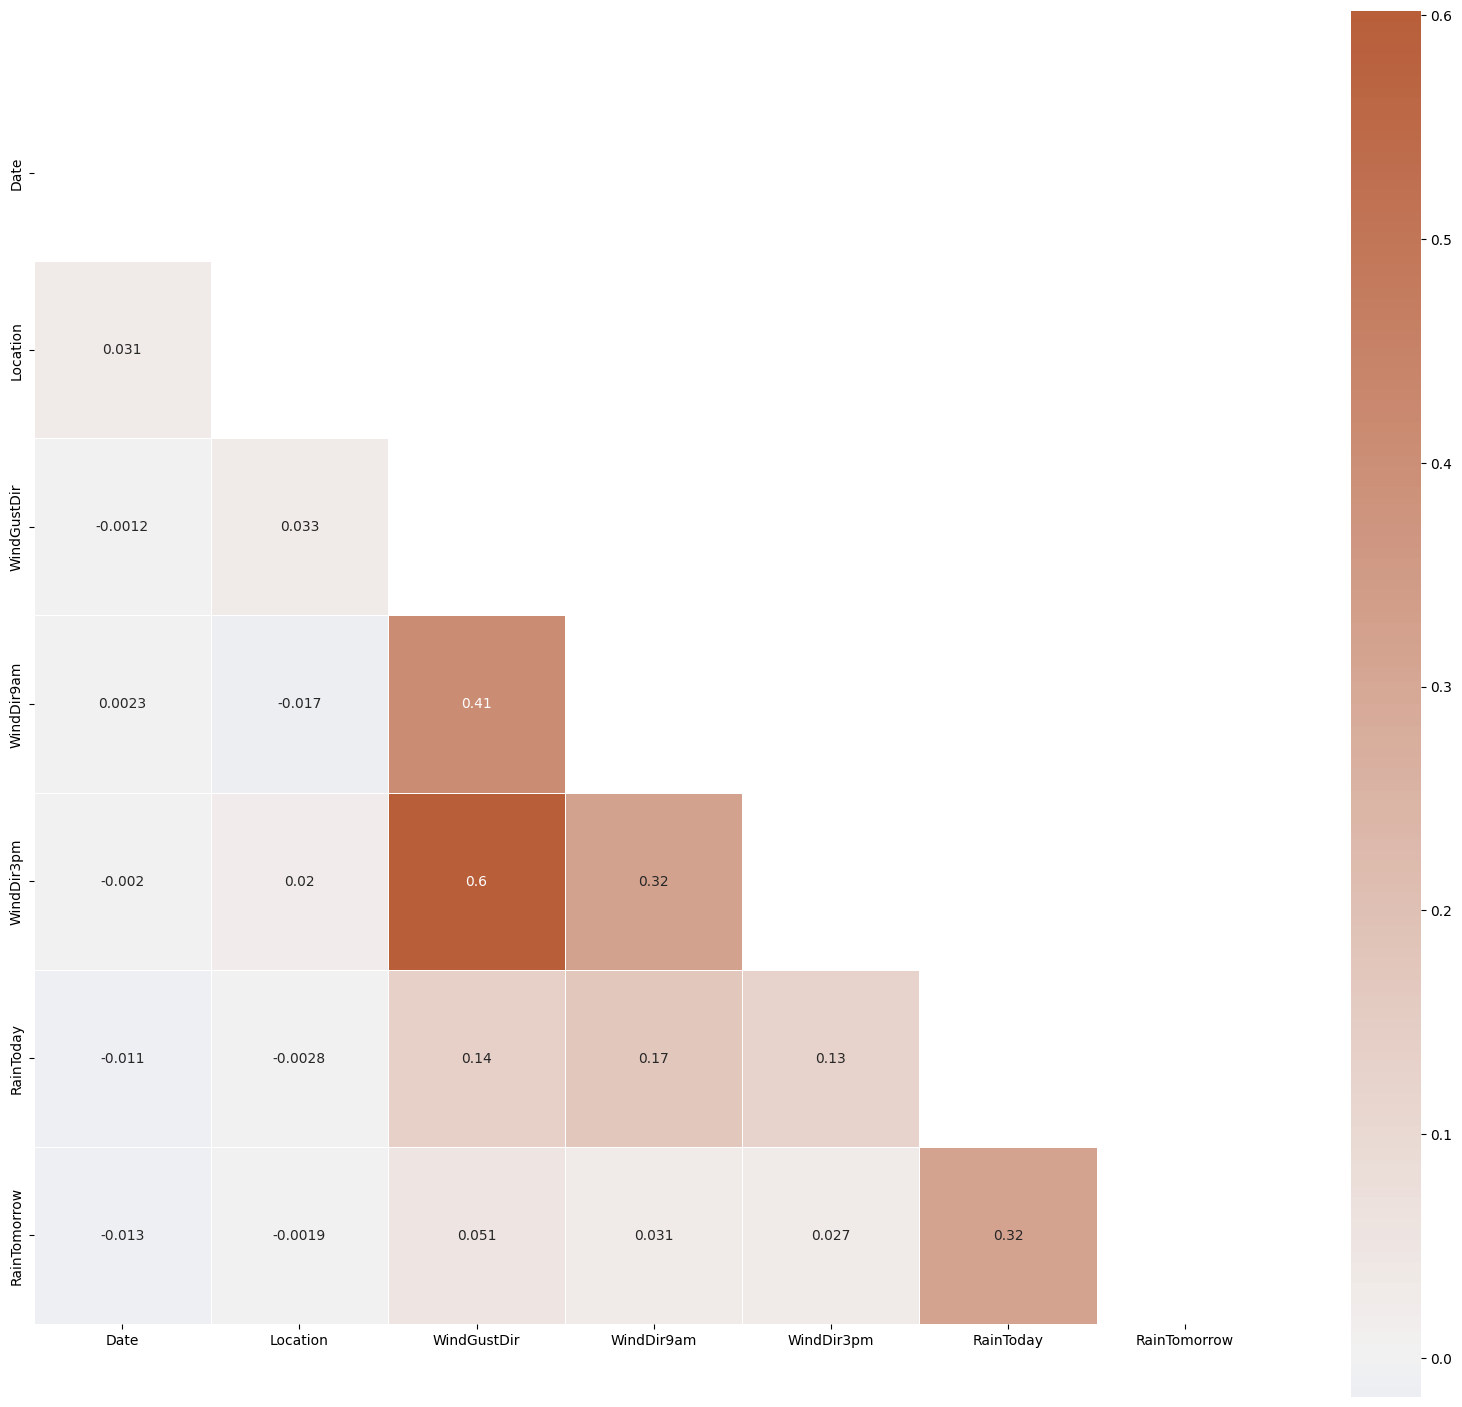

In [26]:
#membuat data correlation dan memvisualisasikannya
corr_ctg = df_ctg.corr()
mask = np.triu(np.ones_like(corr_ctg, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr_ctg, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

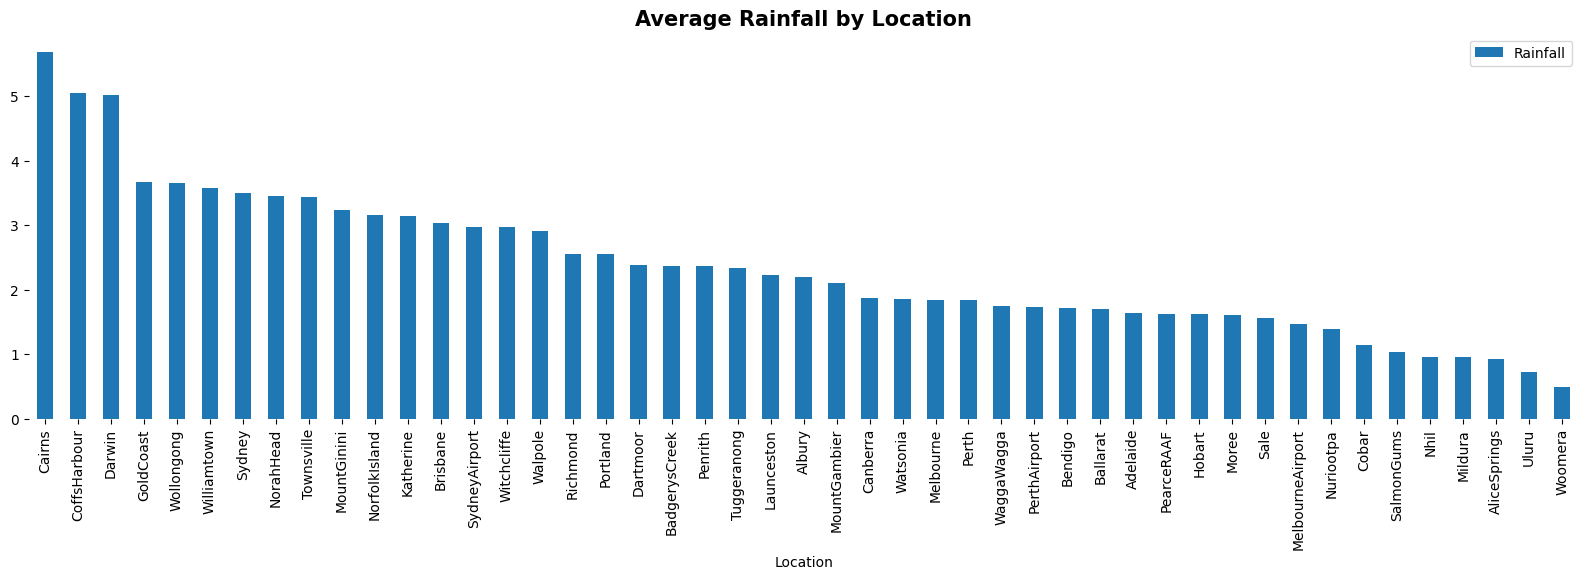

In [27]:
# plotting average Rainfall by Location
df_loc = df1.groupby('Location').agg({'Rainfall':'mean'}).sort_values(by='Rainfall', ascending=False) 

df_loc.plot(kind='bar',figsize=(20,5))
plt.box(False)
plt.title ('Average Rainfall by Location', fontsize=15, fontweight="bold")
plt.show()

In [28]:
df_pred=df1.drop(columns=["WindDir9am","WindDir3pm"])

Data Inspection

In [29]:
#keterkaitan antara Location dan RainTomorrow
dNRT = pd.DataFrame(df_pred[(df_pred['RainTomorrow']=="No")].groupby('Location').count()['RainTomorrow'].sort_values(ascending=True))
dNRT

RainTomorrow
Location                      
Katherine                 1235
Nhil                      1282
Uluru                     1336
Dartmoor                  1588
Walpole                   1640
Richmond                  1645
Williamtown               1688
Sydney                    1689
Melbourne                 1718
CoffsHarbour              1805
MountGinini               1820
Portland                  1823
Witchcliffe               1849
Penrith                   1872
Tuggeranong               1891
Albury                    1916
Launceston                1929
BadgerysCreek             1964
NorfolkIsland             1984
Cairns                    1990
MountGambier              2015
NorahHead                 2016
Watsonia                  2056
PearceRAAF                2068
GoldCoast                 2096
Adelaide                  2120
Ballarat                  2137
Wollongong                2141
SydneyAirport             2189
Sale                      2192
Bendigo                   2208
Canberra                  2254
Nuriootpa                 2258
WaggaWagga                2293
Moree                     2299
Darwin                    2302
MelbourneAirport          2303
Hobart                    2366
Brisbane                  2367
PerthAirport              2368
Townsville                2393
SalmonGums                2404
Perth                     2429
AliceSprings              2520
Cobar                     2548
Mildura                   2588
Woomera                   2724

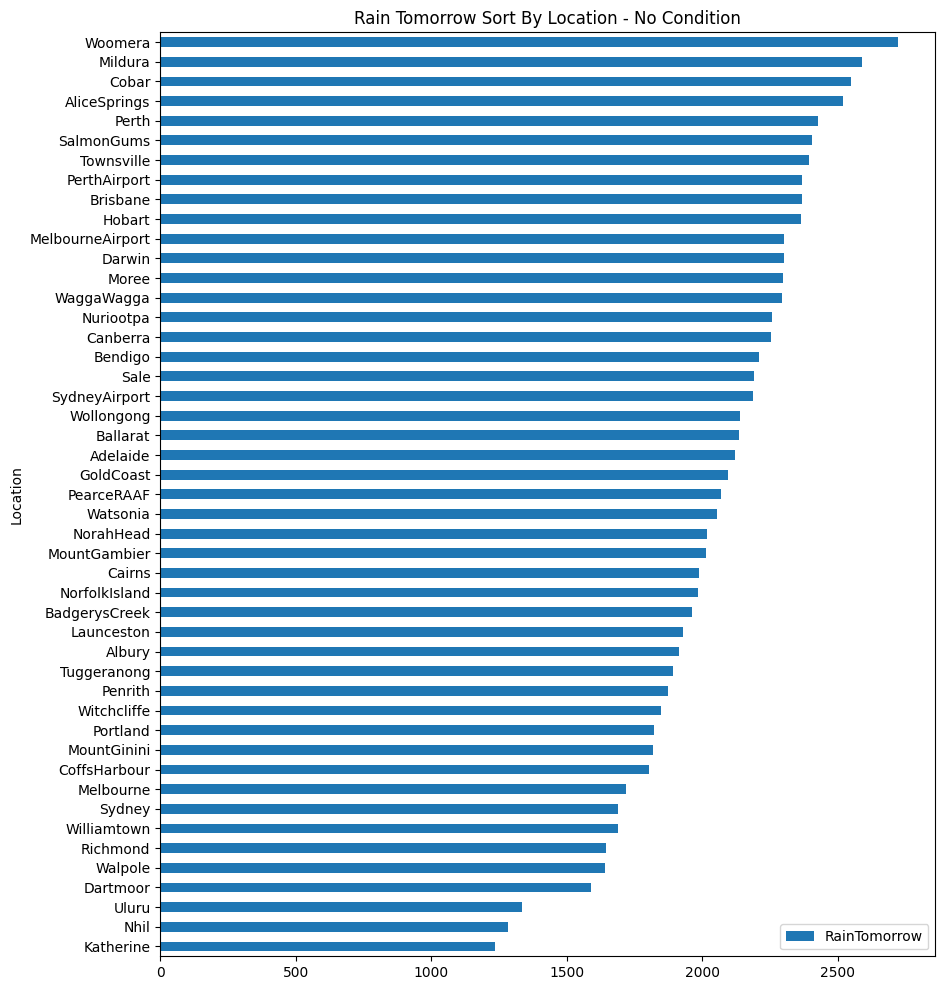

In [30]:
#memvisualisasikan
dNRT.plot(kind="barh", title="Rain Tomorrow Sort By Location - No Condition", figsize=(10,12));

In [31]:
dYRT = pd.DataFrame(df_pred[(df_pred['RainTomorrow']=="Yes")].groupby('Location').count()['RainTomorrow'].sort_values(ascending=True))
dNRT

RainTomorrow
Location                      
Katherine                 1235
Nhil                      1282
Uluru                     1336
Dartmoor                  1588
Walpole                   1640
Richmond                  1645
Williamtown               1688
Sydney                    1689
Melbourne                 1718
CoffsHarbour              1805
MountGinini               1820
Portland                  1823
Witchcliffe               1849
Penrith                   1872
Tuggeranong               1891
Albury                    1916
Launceston                1929
BadgerysCreek             1964
NorfolkIsland             1984
Cairns                    1990
MountGambier              2015
NorahHead                 2016
Watsonia                  2056
PearceRAAF                2068
GoldCoast                 2096
Adelaide                  2120
Ballarat                  2137
Wollongong                2141
SydneyAirport             2189
Sale                      2192
Bendigo                   2208
Canberra                  2254
Nuriootpa                 2258
WaggaWagga                2293
Moree                     2299
Darwin                    2302
MelbourneAirport          2303
Hobart                    2366
Brisbane                  2367
PerthAirport              2368
Townsville                2393
SalmonGums                2404
Perth                     2429
AliceSprings              2520
Cobar                     2548
Mildura                   2588
Woomera                   2724

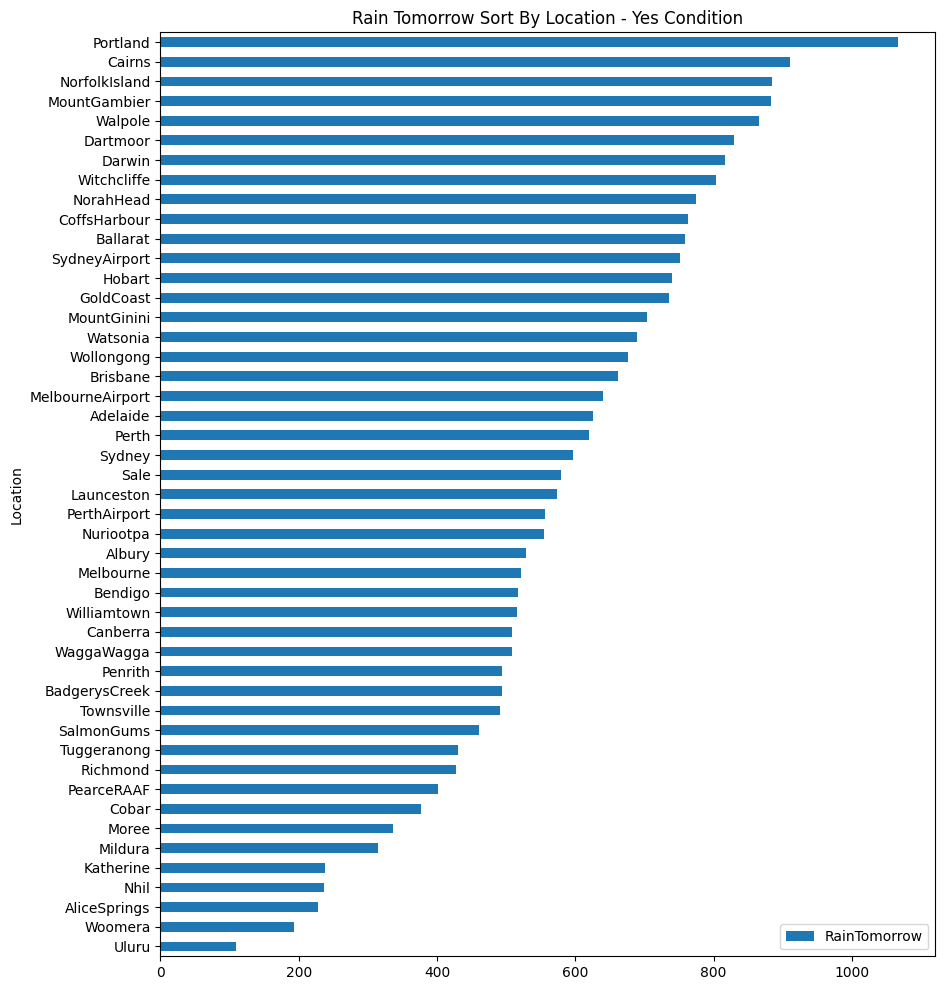

In [32]:
dYRT.plot(kind="barh", title="Rain Tomorrow Sort By Location - Yes Condition", figsize=(10,12));

**Correlation 2 : membuat kolom numerik**

In [33]:
nmr_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "RainTomorrow"
]

df_nmr = df1[nmr_col]

df_nmr.head()

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     21.8     21.8   
1         44.0         25.0       1010.6       1007.8     24.3     24.3   
2         38.0         30.0       1007.6       1008.7     23.2     23.2   
3         45.0         16.0       1017.6       1012.8     26.5     26.5   
4         82.0         33.0       1010.8       1006.0     29.7     29.7   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

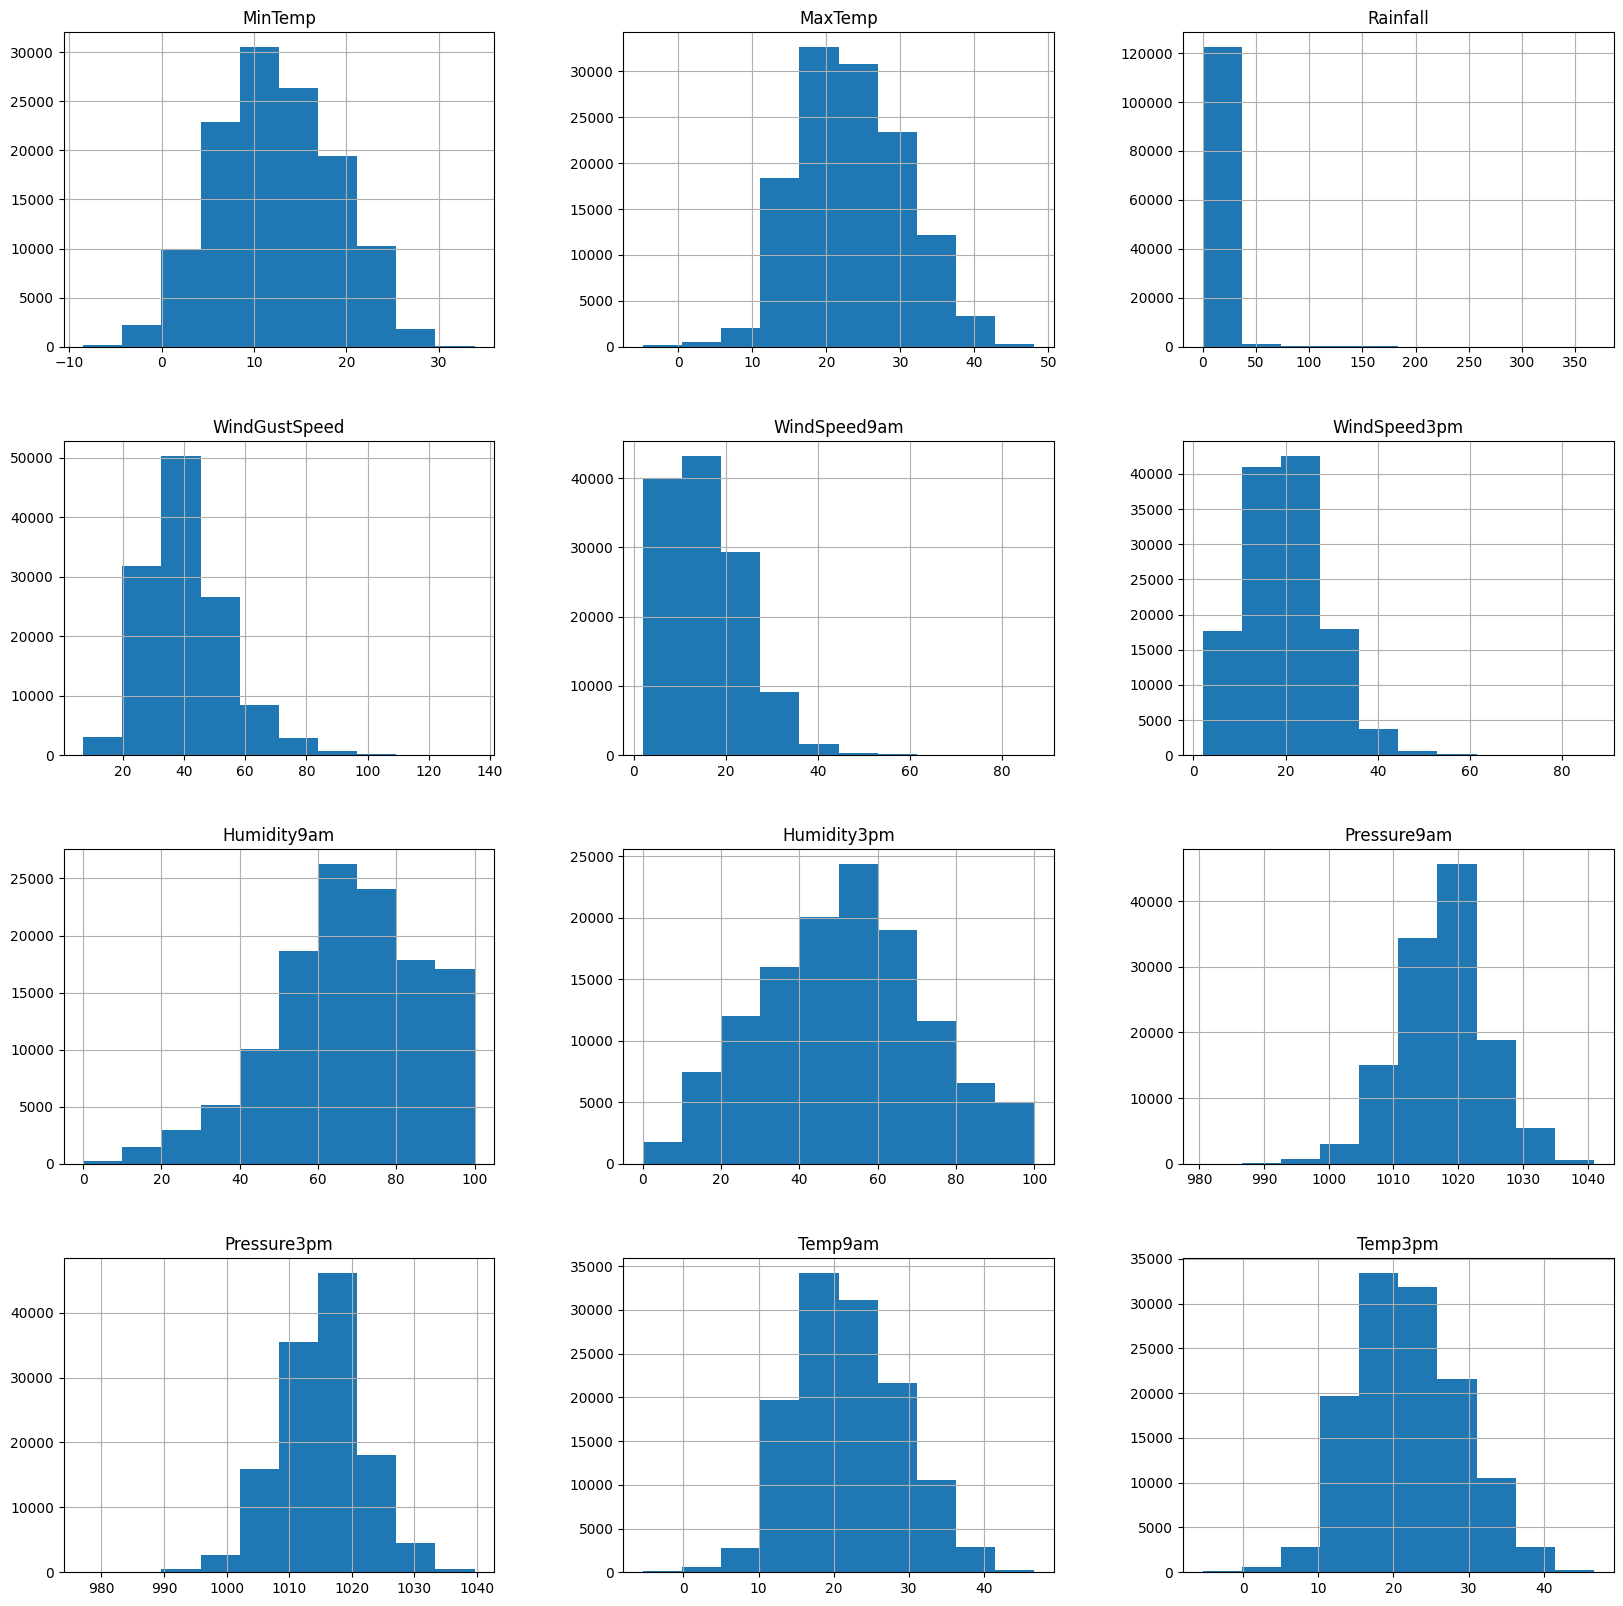

In [34]:
df1[nmr_col].hist(bins=10, figsize = (20,20))

plt.show()

In [35]:
corr_num = df_nmr.corr()
corr_num

C:\Users\USER\AppData\Local\Temp\ipykernel_10344\3650014507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num = df_nmr.corr()


MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.738283  0.099872       0.141259      0.138219   
MaxTemp        0.738283  1.000000 -0.079862       0.037297     -0.015504   
Rainfall       0.099872 -0.079862  1.000000       0.131532      0.085619   
WindGustSpeed  0.141259  0.037297  0.131532       1.000000      0.591774   
WindSpeed9am   0.138219 -0.015504  0.085619       0.591774      1.000000   
WindSpeed3pm   0.153703  0.024165  0.060373       0.675796      0.504546   
Humidity9am   -0.216670 -0.505134  0.236880      -0.176426     -0.219122   
Humidity3pm   -0.000882 -0.508545  0.258584      -0.011814     -0.012809   
Pressure9am   -0.415805 -0.297541 -0.164740      -0.424451     -0.193749   
Pressure3pm   -0.431130 -0.391772 -0.124274      -0.380524     -0.143782   
Temp9am        0.700887  0.968851 -0.084461       0.003257     -0.023684   
Temp3pm        0.706245  0.975000 -0.083478       0.003189     -0.024687   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.153703    -0.216670    -0.000882    -0.415805   
MaxTemp            0.024165    -0.505134    -0.508545    -0.297541   
Rainfall           0.060373     0.236880     0.258584    -0.164740   
WindGustSpeed      0.675796    -0.176426    -0.011814    -0.424451   
WindSpeed9am       0.504546    -0.219122    -0.012809    -0.193749   
WindSpeed3pm       1.000000    -0.100647     0.043991    -0.271338   
Humidity9am       -0.100647     1.000000     0.678741     0.108827   
Humidity3pm        0.043991     0.678741     1.000000    -0.033966   
Pressure9am       -0.271338     0.108827    -0.033966     1.000000   
Pressure3pm       -0.232225     0.159279     0.043456     0.959545   
Temp9am            0.004361    -0.498432    -0.560441    -0.251580   
Temp3pm            0.002926    -0.499824    -0.561195    -0.254417   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.431130  0.700887  0.706245  
MaxTemp          -0.391772  0.968851  0.975000  
Rainfall         -0.124274 -0.084461 -0.083478  
WindGustSpeed    -0.380524  0.003257  0.003189  
WindSpeed9am     -0.143782 -0.023684 -0.024687  
WindSpeed3pm     -0.232225  0.004361  0.002926  
Humidity9am       0.159279 -0.498432 -0.499824  
Humidity3pm       0.043456 -0.560441 -0.561195  
Pressure9am       0.959545 -0.251580 -0.254417  
Pressure3pm       1.000000 -0.351112 -0.355199  
Temp9am          -0.351112  1.000000  0.998563  
Temp3pm          -0.355199  0.998563  1.000000

C:\Users\USER\AppData\Local\Temp\ipykernel_10344\2452856625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num = df_nmr.corr()
C:\Users\USER\AppData\Local\Temp\ipykernel_10344\2452856625.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_num, dtype=np.bool))


<AxesSubplot: >

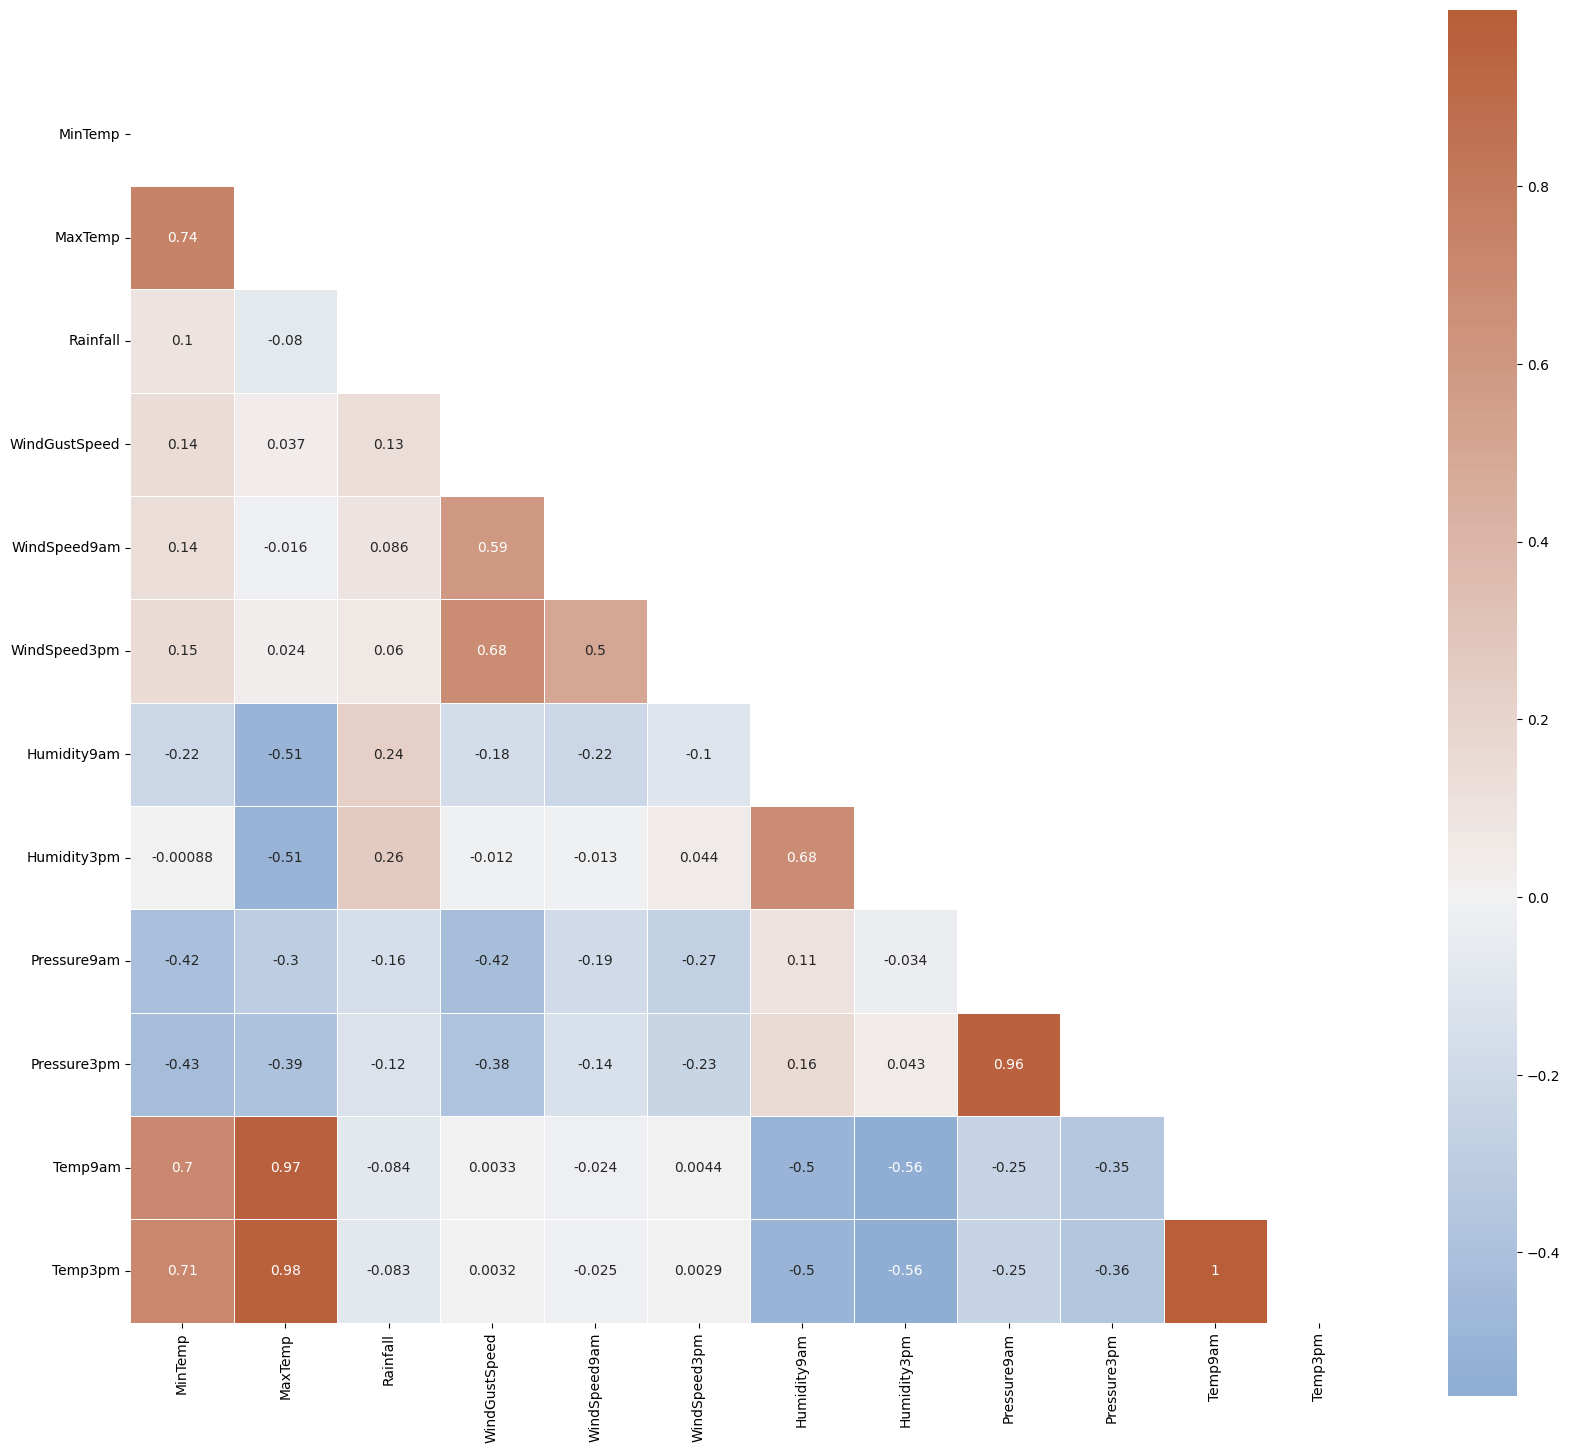

In [36]:
#membuat data correlation dan memvisualisasikannya
corr_num = df_nmr.corr()
mask = np.triu(np.ones_like(corr_num, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr_num, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

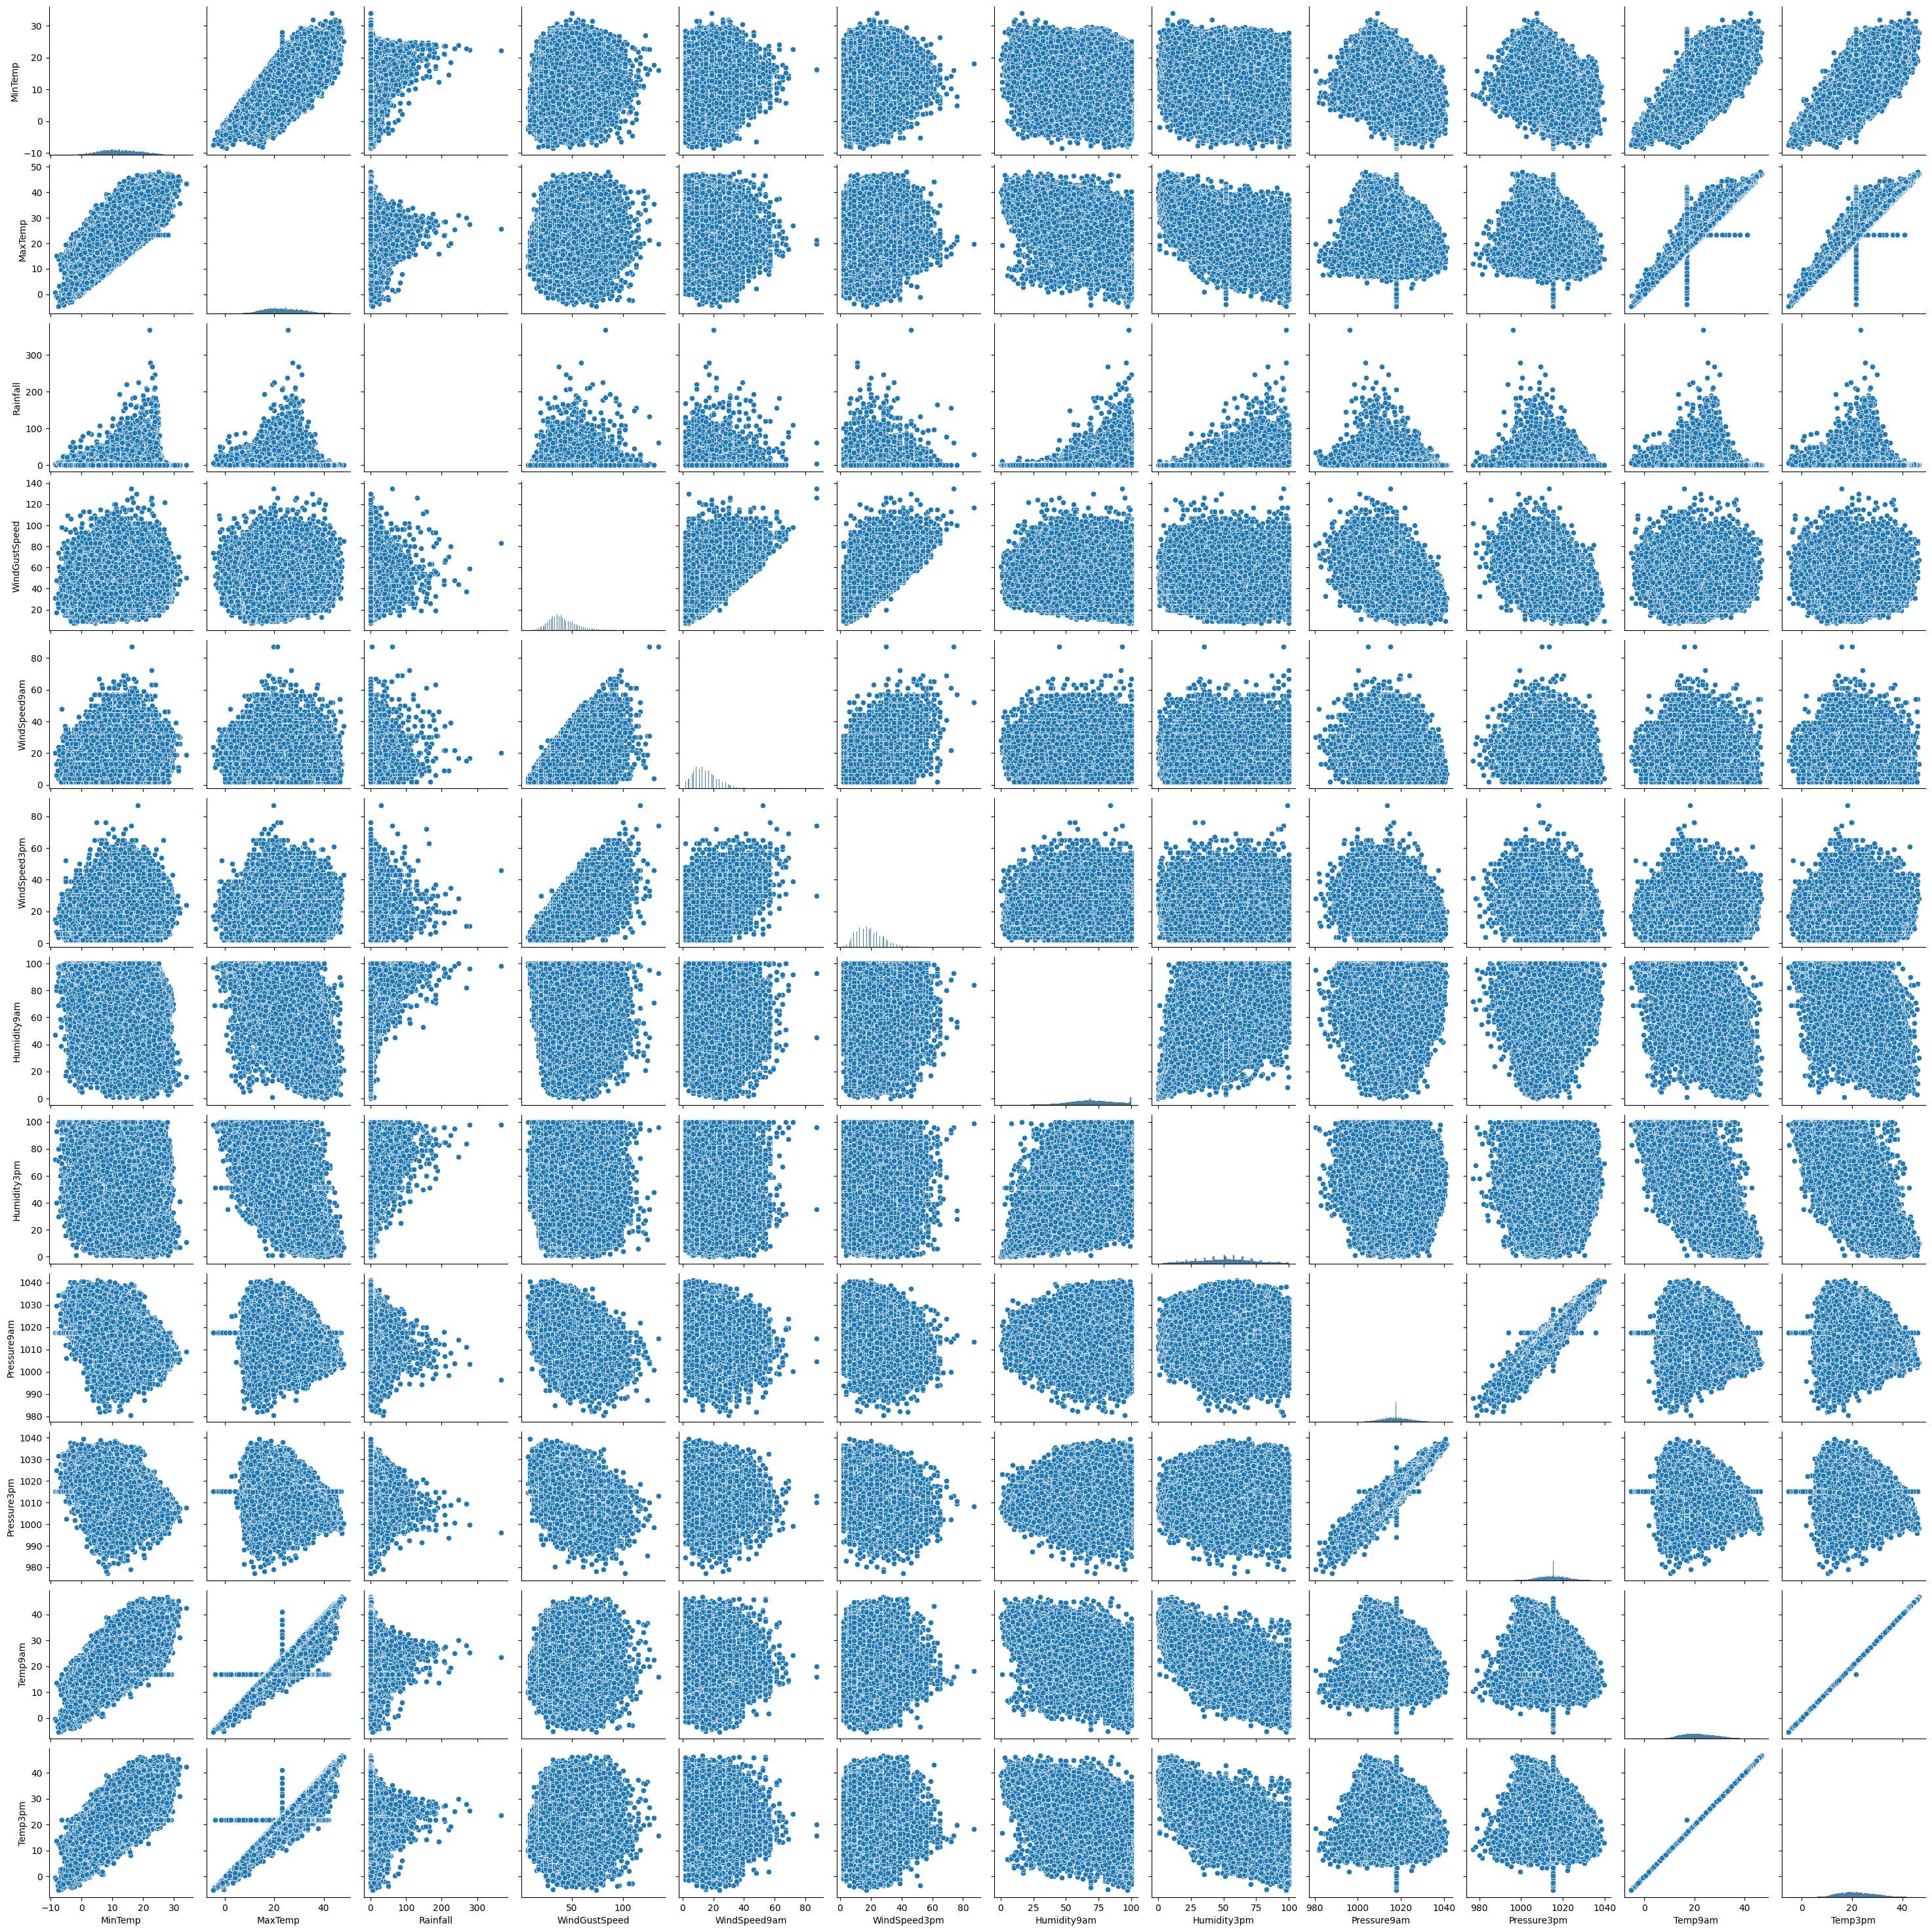

In [37]:
sns.pairplot(df_nmr);

Berdasarkan hasil visualisasi diatas masih terdapat data yang memiliki nilai outlier, maka perlunya dilakukan standarisasi pada data yang bertujuan menghilangkan nilai outlier tersebut.

Mengatasi nilai outlier

In [38]:
#melihat nilai lower limit dan upper limit
q1 = df_nmr.quantile(0.25)
q3 = df_nmr.quantile(0.75)

Iqr = q3-q1

C:\Users\USER\AppData\Local\Temp\ipykernel_10344\3779182378.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df_nmr.quantile(0.25)
C:\Users\USER\AppData\Local\Temp\ipykernel_10344\3779182378.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df_nmr.quantile(0.75)


In [39]:
#menerapkannya pada dataframe
up_limit = pd.DataFrame({"Upper Limit":q3+1.5*Iqr})
low_limit = pd.DataFrame({"Lower Limit":q1-1.5*Iqr})

df_quartile = pd.concat([up_limit, low_limit], axis=1)
df_quartile

Upper Limit  Lower Limit
MinTemp              30.80        -6.00
MaxTemp              44.35         2.35
Rainfall              2.00        -1.20
WindGustSpeed        73.50         5.50
WindSpeed9am         36.50        -7.50
WindSpeed3pm         40.50        -3.50
Humidity9am         118.50        18.50
Humidity3pm         108.50        -7.50
Pressure9am        1034.45      1000.45
Pressure3pm        1032.20       997.80
Temp9am              41.55         1.95
Temp3pm              41.55         1.95

Visualisasi Sederhana

Memprediksi hari esok hujan atau tidak

C:\Users\USER\AppData\Local\Temp\ipykernel_10344\3878971002.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


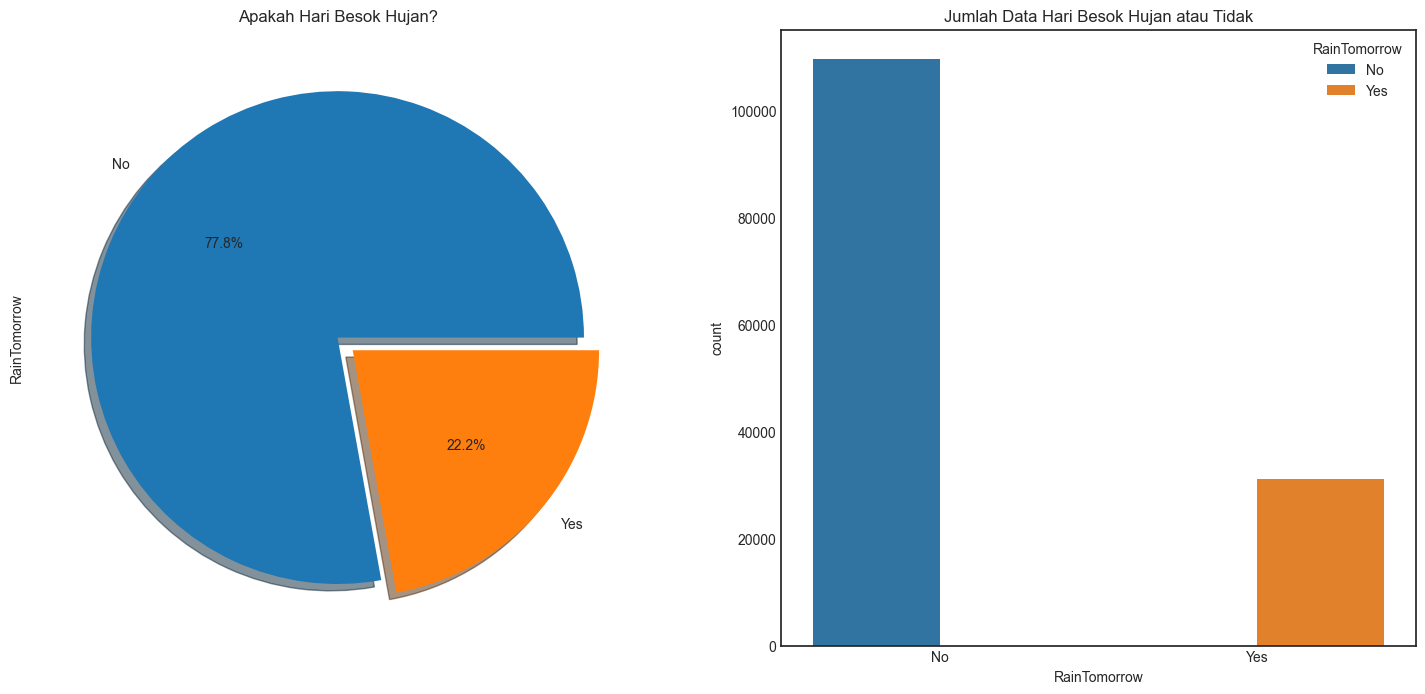

In [40]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['RainTomorrow'].value_counts().plot.pie(explode=[0,0.08], autopct='%1.1f%%',
ax=ax[0], shadow=True)
ax[0].set_title('Apakah Hari Besok Hujan?')
sns.countplot(x = 'RainTomorrow', hue = "RainTomorrow", data = df)
ax[1].set_title('Jumlah Data Hari Besok Hujan atau Tidak')

plt.show()

Dapat disimpulkan bahwa perkiraan hari besok tidak akan hujan dengan presentase 77.8%

Melihat keterkaitan antara WindGustSpeed dengan Rainfall

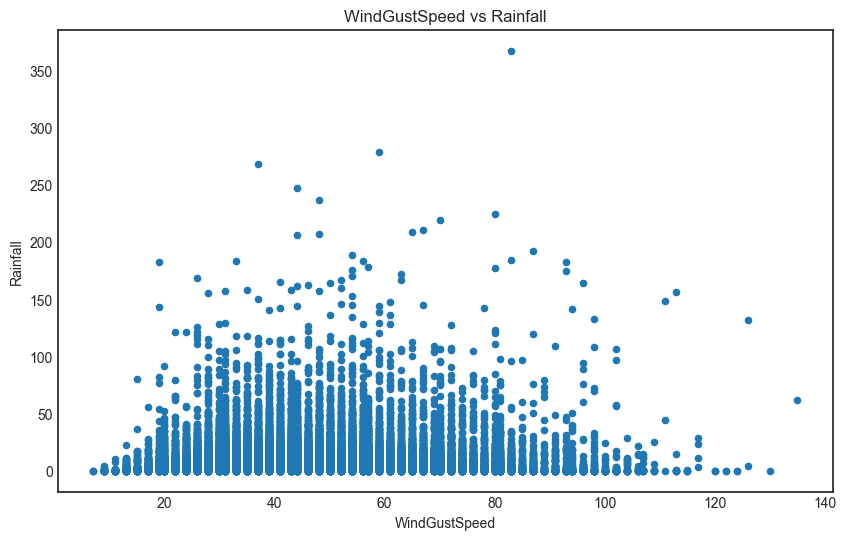

In [41]:
df_nmr.plot(kind='scatter',x='WindGustSpeed', y='Rainfall',
               figsize=(10,6))
plt.title('WindGustSpeed vs Rainfall')

plt.show()

Berdasarkan grafik scatter diatas dapat disimpulkan bahwa kecepatan angin dengan 30 sampai 80 memiliki curah hujan yang tinggi.

In [42]:
re_group = ['MinTemp','MaxTemp','Temp9am','WindSpeed9am','Humidity9am','Pressure3pm','Pressure9am']

df_pred = df_pred.drop(columns=re_group)
df_pred.head(5)

Date Location  Rainfall WindGustDir  WindGustSpeed  WindSpeed3pm  \
0  20081201.0   Albury       0.6           W           44.0          24.0   
1  20081202.0   Albury       0.0         WNW           44.0          22.0   
2  20081203.0   Albury       0.0         WSW           46.0          26.0   
3  20081204.0   Albury       0.0          NE           24.0           9.0   
4  20081205.0   Albury       1.0           W           41.0          20.0   

   Humidity3pm  Temp3pm RainToday RainTomorrow  
0         22.0     21.8        No           No  
1         25.0     24.3        No           No  
2         30.0     23.2        No           No  
3         16.0     26.5        No           No  
4         33.0     29.7        No           No

# Preprocessing

Memeriksa data numerik

In [43]:
#Location
df_num_loc = pd.DataFrame(
    {
        "Location":df_pred["Location"].unique(),
        "location_num":df_ctg["Location"].unique()
    }
).sort_values(by="location_num", ascending=True)

df_num_loc = df_num_loc.set_index(keys="location_num",drop=True)
df_num_loc

Location
location_num                  
0                     Adelaide
1                       Albury
2                 AliceSprings
3                BadgerysCreek
4                     Ballarat
5                      Bendigo
6                     Brisbane
7                       Cairns
8                     Canberra
9                        Cobar
10                CoffsHarbour
11                    Dartmoor
12                      Darwin
13                   GoldCoast
14                      Hobart
15                   Katherine
16                  Launceston
17                   Melbourne
18            MelbourneAirport
19                     Mildura
20                       Moree
21                MountGambier
22                 MountGinini
23                        Nhil
24                   NorahHead
25               NorfolkIsland
26                   Nuriootpa
27                  PearceRAAF
28                     Penrith
29                       Perth
30                PerthAirport
31                    Portland
32                    Richmond
33                        Sale
34                  SalmonGums
35                      Sydney
36               SydneyAirport
37                  Townsville
38                 Tuggeranong
39                       Uluru
40                  WaggaWagga
41                     Walpole
42                    Watsonia
43                 Williamtown
44                 Witchcliffe
45                  Wollongong
46                     Woomera

In [44]:
#WindGustDir
df_num_wind = pd.DataFrame(
    {
        "WindGustDir":df_pred["WindGustDir"].unique(),
        "wind_gust_dir_num":df_ctg["WindGustDir"].unique()
    }
).sort_values(by="wind_gust_dir_num", ascending=True)

df_num_wind = df_num_wind.set_index(keys="wind_gust_dir_num",drop=True)
df_num_wind

WindGustDir
wind_gust_dir_num            
0                           E
1                         ENE
2                         ESE
3                           N
4                          NE
5                         NNE
6                         NNW
7                          NW
8                           S
9                          SE
10                        SSE
11                        SSW
12                         SW
13                          W
14                        WNW
15                        WSW

In [45]:
#mengubah kolom kategori dengan encode label
df_pred['Location']=df_ctg['Location']
df_pred['WindGustDir']=df_ctg['WindGustDir']
df_pred['RainToday']=df_ctg['RainToday']
df_pred['RainTomorrow']=df_ctg['RainTomorrow']
df_pred.head()

Date  Location  Rainfall  WindGustDir  WindGustSpeed  WindSpeed3pm  \
0  20081201.0         1       0.6           13           44.0          24.0   
1  20081202.0         1       0.0           14           44.0          22.0   
2  20081203.0         1       0.0           15           46.0          26.0   
3  20081204.0         1       0.0            4           24.0           9.0   
4  20081205.0         1       1.0           13           41.0          20.0   

   Humidity3pm  Temp3pm  RainToday  RainTomorrow  
0         22.0     21.8          0             0  
1         25.0     24.3          0             0  
2         30.0     23.2          0             0  
3         16.0     26.5          0             0  
4         33.0     29.7          0             0

# Pendefinisian Model

Pada final project kali ini, metode yang akan digunakan adalah Logistic Regression dan Support Vector Machine(SVM). 

Logistic Regression sendiri merupakan sebuah metode yang bertujuan untuk mengindentifikasi hubungan antara variabel independen dan variabel dependen dengan cara memperkirakan probabilitas menggunakan fungsi logistik.

Sedangkan Support Vector Machine merupakan sebuah algoritma yang dimana mengawalinya dengan mengelompokkan kasus-kasus linear yang dapat dipisahkan dengan hyperplane dan kemudian dibagi  menuruh kelasnya.

In [46]:
#Membuat variabel x untuk menampung semua kolom kecuali RainTomorrow
X=df_pred.drop(columns=['RainTomorrow'])

#Membuat variabel y untuk menampung kolom RainTomorrow
y=df_pred['RainTomorrow']

In [47]:
#Split x and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [48]:
#Standarisasi data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Membuat model logistic regression

> Model training

In [49]:
for Location in df1.columns: 
    if df1[Location].dtype == 'object': 
        df1[Location] = pd.Categorical(df1[Location]).codes

In [50]:
#membuat logistic regression
log_algo=LogisticRegression(solver='liblinear', random_state=0)

#model training
log_algo.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

> evaluasi model

In [51]:
#Model Training Logistic Regression
log_algo = log_algo.fit(X_train, y_train)

In [52]:
#Predict result
y_pred_log=log_algo.predict(X_test)
y_pred_log

array([0, 0, 0, ..., 0, 0, 1])

In [53]:
#Predict proba

#probabilitas mendapatkan output 0 (tidak hujan)
log_algo.predict_proba(X_train)[:,0]

array([0.74574194, 0.96362829, 0.93195068, ..., 0.76238382, 0.56572996,
       0.82879402])

In [54]:
#probabilitas mendapatkan output 1 (hujan)
log_algo.predict_proba(X_train)[:,1]

array([0.25425806, 0.03637171, 0.06804932, ..., 0.23761618, 0.43427004,
       0.17120598])

In [55]:
#mengecek accuracy score

print('Model accuracy score on test set: {:.4f}'.format(log_algo.score(X_test, y_test)))

Model accuracy score on test set: 0.8405


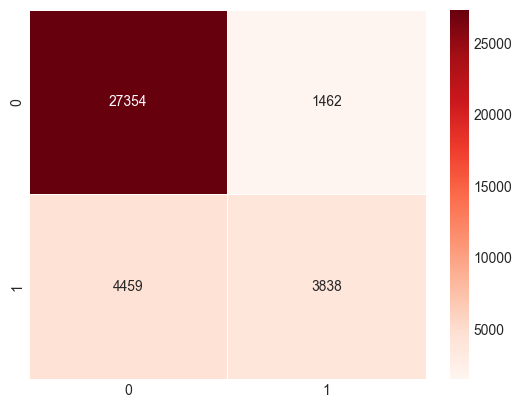

In [56]:
#membuat visualisasi confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',)

plt.show()

In [57]:
#Classification Report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28816
           1       0.72      0.46      0.56      8297

    accuracy                           0.84     37113
   macro avg       0.79      0.71      0.73     37113
weighted avg       0.83      0.84      0.83     37113



In [58]:
#melihat feature importance
importance=log_algo.coef_[0]
sorted_index=np.argsort(importance)
labels=X.columns[sorted_index]
df_importance=pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
df_importance=df_importance.sort_values(by=['Feature Importance'], ascending=False)
df_importance

Feature Name  Feature Importance
8    Humidity3pm            1.449046
7  WindGustSpeed            0.887286
6        Temp3pm            0.254915
5      RainToday            0.228611
4       Rainfall            0.079358
3    WindGustDir            0.007572
2           Date           -0.027388
1       Location           -0.078819
0   WindSpeed3pm           -0.368688

In [59]:
df_pred2 = df_pred.drop(columns=[
    "Date",
    "Temp3pm",
    "WindGustSpeed",
    "WindSpeed3pm",
    "WindGustDir"
])
df_pred2.head()

Location  Rainfall  Humidity3pm  RainToday  RainTomorrow
0         1       0.6         22.0          0             0
1         1       0.0         25.0          0             0
2         1       0.0         30.0          0             0
3         1       0.0         16.0          0             0
4         1       1.0         33.0          0             0

Membuat model 2

In [60]:
X_2=df_pred2.drop(columns=['RainTomorrow'])
y_2=df_pred2['RainTomorrow']

X_train2, X_test2, y_train2,y_test2=train_test_split(X_2,y_2, test_size=0.3)

X_train2=scaler.fit_transform(X_train2)
X_test2=scaler.fit_transform(X_test2)

Membuat model logistic regression 2

In [61]:
#membuat logistic regression 2
log_algo_2=LogisticRegression(solver='liblinear', random_state=0)

> Model training

In [62]:
#model training
log_algo_2.fit(X_train2, y_train2)

LogisticRegression(random_state=0, solver='liblinear')

Evaluasi model

In [63]:
#Predict result
y_pred_log=log_algo_2.predict(X_test2)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
#Predict proba

#probabilitas mendapatkan output 0 (tidak hujan)
log_algo_2.predict_proba(X_train2)[:,0]

array([0.82565755, 0.96056099, 0.35321874, ..., 0.84138376, 0.66821572,
       0.50845613])

In [65]:
#probabilitas mendapatkan output 1 (hujan)
log_algo_2.predict_proba(X_train2)[:,1]

array([0.17434245, 0.03943901, 0.64678126, ..., 0.15861624, 0.33178428,
       0.49154387])

In [66]:
#mengecek accuracy score
print('Model accuracy score on train set: {:.4f}'.format(log_algo_2.score(X_train2, y_train2)))

print('Model accuracy score on test set: {:.4f}'.format(log_algo_2.score(X_test2, y_test2)))

Model accuracy score on train set: 0.8329
Model accuracy score on test set: 0.8316


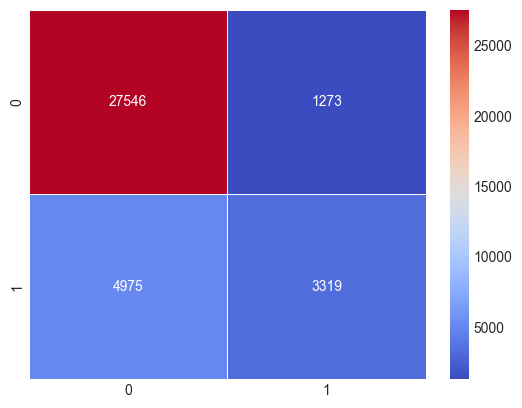

In [67]:
#membuat visualisasi confusion matrix
cm_log = confusion_matrix(y_test2, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", linewidths=.5, cmap = 'coolwarm',)

plt.show()

In [68]:
#Classification Report
print(classification_report(y_test2,y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     28819
           1       0.72      0.40      0.52      8294

    accuracy                           0.83     37113
   macro avg       0.78      0.68      0.71     37113
weighted avg       0.82      0.83      0.81     37113



Membuat model SVM

> Model training

In [69]:
#membuat svm
svm_algo = svm.SVC(kernel = 'linear', random_state = 1, C = 1.0, probability=True)

In [70]:
#model training
svm_algo.fit(X_train2, y_train2)

SVC(kernel='linear', probability=True, random_state=1)

> Evaluasi model

In [71]:
#Predict result
y_pred_svm=svm_algo.predict(X_test2)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
#Predict proba

#probabilitas mendapatkan output 0 (tidak hujan)
svm_algo.predict_proba(X_train2)[:,0]

array([0.82254736, 0.95635082, 0.33044226, ..., 0.8383376 , 0.67915082,
       0.53558429])

In [73]:
#probabilitas mendapatkan output 1 (hujan)
svm_algo.predict_proba(X_train2)[:,1]

array([0.17745264, 0.04364918, 0.66955774, ..., 0.1616624 , 0.32084918,
       0.46441571])

In [74]:
#mengecek accuracy score
print('Model accuracy score on train set: {:.4f}'.format(svm_algo.score(X_train2, y_train2)))

print('Model accuracy score on test set: {:.4f}'.format(svm_algo.score(X_test2, y_test2)))

Model accuracy score on train set: 0.8304
Model accuracy score on test set: 0.8277


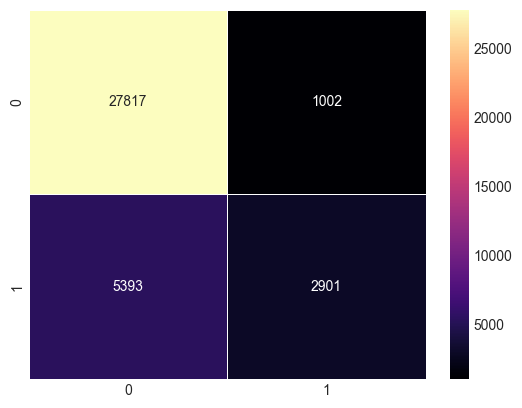

In [75]:
#membuat visualisasi confusion matrix
cm_svm = confusion_matrix(y_test2, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'magma',)

plt.show()

In [76]:
#Classification Report
print(classification_report(y_test2,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     28819
           1       0.74      0.35      0.48      8294

    accuracy                           0.83     37113
   macro avg       0.79      0.66      0.69     37113
weighted avg       0.82      0.83      0.80     37113



Cek nilai RMSE

In [77]:
lr_mse = mean_squared_error(y_test,y_pred_log)
rootmeansq = np.sqrt(lr_mse)
print('Mean squared error: ', lr_mse)
print('Root mean absolute error: ', rootmeansq)

Mean squared error:  0.29092231832511517
Root mean absolute error:  0.5393721519740476


In [78]:
svm_mse = mean_squared_error(y_test2,y_pred_svm)
rootmeansq = np.sqrt(svm_mse)
print('Mean squared error: ', svm_mse)
print('Root mean absolute error: ', rootmeansq)

Mean squared error:  0.17231158893110232
Root mean absolute error:  0.4151043109040212


Model Inference

In [79]:
cnth_model = {
    "Location":[2, 3, 4, 5],
    "Rainfall":[0.0, 0.2, 0.4, 0.6],
    "Humidity3pm":[20.0, 16.0, 32.0, 10.0],
    "RainToday":[0, 0, 1, 1],
}

data_uji = pd.DataFrame(cnth_model)
data_uji.head(5)

Location  Rainfall  Humidity3pm  RainToday
0         2       0.0         20.0          0
1         3       0.2         16.0          0
2         4       0.4         32.0          1
3         5       0.6         10.0          1

In [80]:
sc = StandardScaler()
data_uji = sc.fit_transform(data_uji)

In [81]:
pred1 = log_algo_2.predict(data_uji)
pred2 = svm_algo.predict(data_uji)

print("Logistic Regression Model = ",pred1)
print("Support Virtual Machine Model = ",pred2)

Logistic Regression Model =  [0 0 1 0]
Support Virtual Machine Model =  [0 0 1 0]


In [82]:
pickle.dump(log_algo_2, open('log_algo.pkl','wb'))
pickle.dump(svm_algo, open('svm_algo.pkl','wb'))

In [83]:
# Loading model to compare the results
log_algo = pickle.load(open('log_algo.pkl','rb'))
print(log_algo.predict([[2, 0.0, 20.0, 0]]))

[1]
